In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
def create_centered_mean(series):
    series = pd.DataFrame(series)
    centered_avg = series.rolling(window = 3, center = True)
    centered_avg = centered_avg.mean()
    return centered_avg

In [3]:
def data_loading():
    station_data = pd.read_csv('stations_cleaned.csv.gz', usecols = ['dock_name','date', 'hour', 
                                                                     'minute', 'time','avail_docks',
                                                                     'tot_docks'])
    kmeans = pd.read_csv('kmeans_output')
    kmeans = kmeans.drop('Unnamed: 0', axis = 1)
    station_data = station_data.set_index('dock_name')
    kmeans = kmeans.set_index('start station name')
    station_data = station_data.merge(kmeans, left_index = True, right_on = 'start station name')
    station_data = station_data.reset_index()
    station_data.hour = station_data.hour.astype(str).apply(lambda x: x.zfill(2))
    station_data.loc[station_data['hour'] == '24', 'hour'] = '00'
    station_data.minute = station_data.minute.astype(str).apply(lambda x: x.zfill(2))
    station_data['time'] = station_data.hour + ':' + station_data.minute + ':' +  '00'
    station_data['datetime'] = pd.to_datetime(station_data['date'] + ' ' + station_data['time'])
    station_data = station_data.set_index(station_data['datetime'])
    station_data = station_data.drop(['date', 'hour', 'minute', 'time'], axis = 1)
    station_data['percent_inventory'] = station_data['avail_docks'] / station_data['tot_docks']
    return station_data

In [4]:
station_data = data_loading()

In [5]:
docks_avail = station_data.groupby([pd.Grouper(freq = 'm'),'cluster'])['avail_docks'].sum()

In [6]:
docks_count_0 = docks_avail[pd.IndexSlice[:,0]]

In [7]:
centered_inventory = create_centered_mean(docks_count_0)

In [184]:
clust_0 = seasonal_decompose(docks_count_0, model = 'multiplicative')

<ipython-input-193-702ef6fcbd1f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(docks_count_0.index,rotation=90)


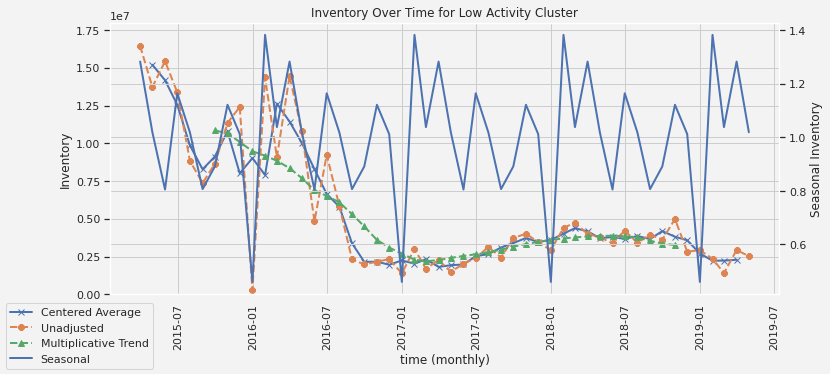

In [193]:
fig, ax1 = plt.subplots(figsize = (12,5))
colors = ["#263571", '#ea2029', '#39a2e1']
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
ax1.set_xlabel('time (monthly)')
ax1.set_xticklabels(docks_count_0.index,rotation=90)
ax1.set_ylabel('Inventory')
plt.title('Inventory Over Time for Low Activity Cluster')
ax1.plot(docks_count_0.index, centered_inventory, marker='x', 
         linewidth=2, label="toto")
ax1.plot(docks_count_0.index, docks_count_0, marker='8', 
         linewidth=2, linestyle='dashed', label="toto")
ax1.plot(docks_count_0.index, clust_0.trend, marker='^', 
         linewidth=2, linestyle='dashed', label="toto")
ax1.set_ylim(-2,1.8e7)
ax2 = ax1.twinx()
ax2.plot(docks_count_0.index, clust_0.seasonal, marker='', 
         linewidth=2, label="toto")
ax2.set_ylabel('Seasonal Inventory')
fig.legend(['Centered Average', 'Unadjusted', 'Multiplicative Trend', 'Seasonal'], loc=3)
sns.set_palette(sns.color_palette(colors))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

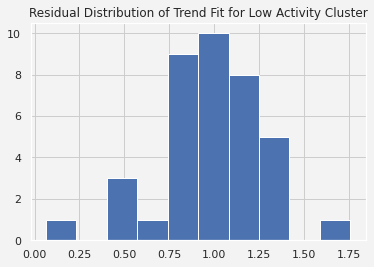

In [186]:
colors = ["#263571", '#ea2029', '#39a2e1']
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
plt.hist(clust_0.resid)
plt.title('Residual Distribution of Trend Fit for Low Activity Cluster')
plt.show

<ipython-input-194-c75be2f66ab2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(docks_count_0.index,rotation=90)


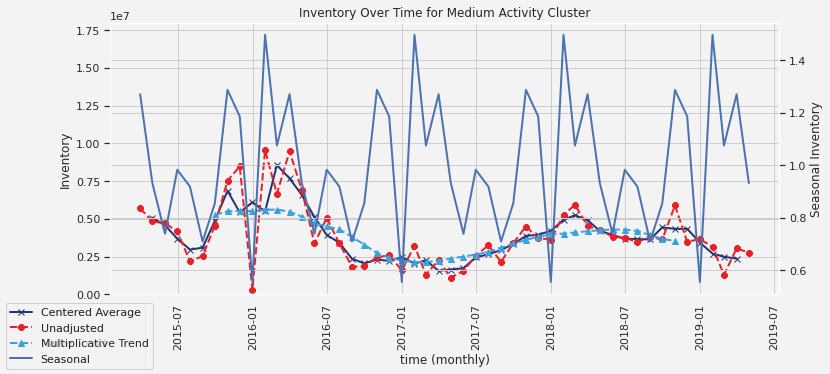

<Figure size 4608x5184 with 0 Axes>

In [194]:
docks_count_1 = docks_avail[pd.IndexSlice[:,1]]
centered_inventory_1 = create_centered_mean(docks_count_1)
clust_1 = seasonal_decompose(docks_count_1, model = 'multiplicative')
fig, ax1 = plt.subplots(figsize = (12,5))
colors = ["#263571", '#ea2029', '#39a2e1']
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
ax1.set_xlabel('time (monthly)')
ax1.set_xticklabels(docks_count_0.index,rotation=90)
ax1.set_ylabel('Inventory')
ax1.plot(docks_count_1.index, centered_inventory_1, marker='x', 
         linewidth=2, label="toto")
ax1.plot(docks_count_1.index, docks_count_1, marker='8', 
         linewidth=2, linestyle='dashed', label="toto")
ax1.plot(docks_count_1.index, clust_1.trend, marker='^', 
         linewidth=2, linestyle='dashed', label="toto")
ax1.set_ylim(-2,1.8e7)
ax2 = ax1.twinx()
ax2.plot(docks_count_1.index, clust_1.seasonal, marker='', 
         linewidth=2, label="toto")
ax2.set_ylabel('Seasonal Inventory')
plt.title('Inventory Over Time for Medium Activity Cluster')
fig.legend(['Centered Average', 'Unadjusted', 'Naive Trend', 'Seasonal'], loc=3)

plt.figure(figsize = (64, 72))
fig.legend(['Centered Average', 'Unadjusted', 'Multiplicative Trend', 'Seasonal'], loc=3)
sns.set_palette(sns.color_palette(colors))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

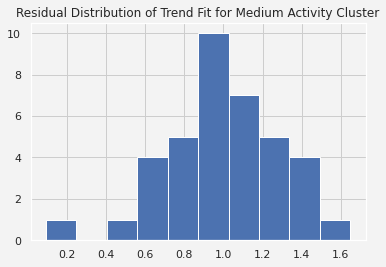

In [189]:
colors = ["#263571", '#ea2029', '#39a2e1']
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
plt.hist(clust_1.resid)
plt.title('Residual Distribution of Trend Fit for Medium Activity Cluster')
plt.show

<ipython-input-195-9ed675ca9020>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(docks_count_2.index,rotation=90)


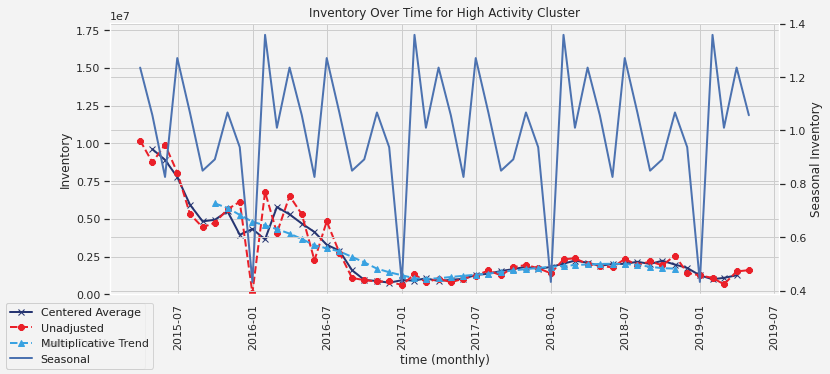

<Figure size 4608x5184 with 0 Axes>

In [195]:
docks_count_2 = docks_avail[pd.IndexSlice[:,2]]
centered_inventory_2 = create_centered_mean(docks_count_2)
clust_2 = seasonal_decompose(docks_count_2, model = 'multiplicative')
fig, ax1 = fig, ax1 = plt.subplots(figsize = (12,5))
colors = ["#263571", '#ea2029', '#39a2e1']
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
ax1.set_xlabel('time (monthly)')
ax1.set_xticklabels(docks_count_2.index,rotation=90)
ax1.set_ylabel('Inventory')
ax1.plot(docks_count_2.index, centered_inventory_2, marker='x', 
         linewidth=2, label="toto")
ax1.plot(docks_count_2.index, docks_count_2, marker='8', 
         linewidth=2, linestyle='dashed', label="toto")
ax1.plot(docks_count_2.index, clust_2.trend, marker='^', 
         linewidth=2, linestyle='dashed', label="toto")
ax1.set_ylim(-2,1.8e7)
ax2 = ax1.twinx()
ax2.plot(docks_count_2.index, clust_2.seasonal, marker='', 
         linewidth=2, label="toto")
ax2.set_ylabel('Seasonal Inventory')
plt.title('Inventory Over Time for High Activity Cluster')
fig.legend(['Centered Average', 'Unadjusted', 'Naive Trend', 'Seasonal'], loc=3)

plt.figure(figsize = (64, 72))
fig.legend(['Centered Average', 'Unadjusted', 'Multiplicative Trend', 'Seasonal'], loc=3)
sns.set_palette(sns.color_palette(colors))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

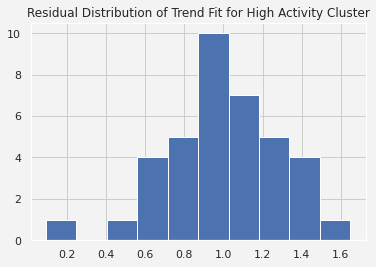

In [192]:
colors = ["#263571", '#ea2029', '#39a2e1']
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
plt.hist(clust_1.resid)
plt.title('Residual Distribution of Trend Fit for High Activity Cluster')
plt.show